- Author: Maximiliano Lopez Salgado
- First Commit: 2023-07-04                      (folowing ISO  8601 Format)
- Last Commit: 2023-07-04                       (folowing ISO  8601 Format)
- Description: This notebook is used to perform EDA on the Superstore dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from folium import plugins
import sqlite3

# Exploratory Data Analysis (EDA)

## 1. Understanding the data

### 1.1 Gathering data

In [3]:
# Import csv cleaned files 
superstore_df = pd.read_csv('../datasets/Sample-Superstore.csv', encoding='latin1')


### 1.2 Assesing data

In [4]:
# Take a look of the data´s shape
display(superstore_df.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [5]:
# Take a look of the data´s info
display(superstore_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

In [6]:
# Rename the columns to lowercase and remove spaces
superstore_df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

# Print the updated column names
print(superstore_df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [7]:
# Change the data type
superstore_df['order_date'] = pd.to_datetime(superstore_df['order_date'])

In [8]:
# Use describe method to get descriptive statistics
display(superstore_df.describe())

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 2. Extracting and Plotting the data

From the dataframes we have, here are some potential information we can extract:

**DataFrame: Superstore_df**
- Datetime purchasing patterns 
    - Yearly Analysis
    - Quarterly Analysis
    - Monatly Analysis
    - Weekly Analysis
    - Daily Analysis 


- Profit, sales and loss margin analysis
    - Profit generated by each product
    - Sum of profits per product
    - Top 10 most profitable products
    - Top10 total profit per product
    - Top10 total loss per product
    - Top 10 products with the biggest loss
    - Top 10 total sales per product
    - Sum of the total sales


- Customer Purchasing Behavior Analysis
    - Customers with the highest number of orders
    - Customers with the lowest number of orders 
    - Plot of the growth rate of new customers over the months

- KPI'S
    - Average order value (revenue / total orders)
    - Repeat purchase rate (purchase from repeat customers / total purchase)
    - Average profit margin (gross profit / revenue)
    - Purchase frequency (total # of orders / total # of unique customers)
    - Year over year growth (last year / this year)

- Geographical Analysis
    - Top5 states generation the most sales revenue
    - Top5 states generation the least sales revenue


- Analyses specific to geolocation data
    - Geographic distribution of Customers on a map
    - Heatmap of cities with highest ammounts of sales

# DataFrame: Superstore_df

## Purchasing patterns analysis

In [9]:
# Extract additional date components from the 'Order Date' column:
superstore_df['year'] = superstore_df['order_date'].dt.year
superstore_df['quarter'] = superstore_df['order_date'].dt.quarter
superstore_df['month'] = superstore_df['order_date'].dt.month
superstore_df['week'] = superstore_df['order_date'].dt.isocalendar().week
superstore_df['day'] = superstore_df['order_date'].dt.dayofweek


### Yearly Analysis

In [10]:
yearly_sales = superstore_df.groupby('year')['sales'].sum()
print(yearly_sales)

year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: sales, dtype: float64


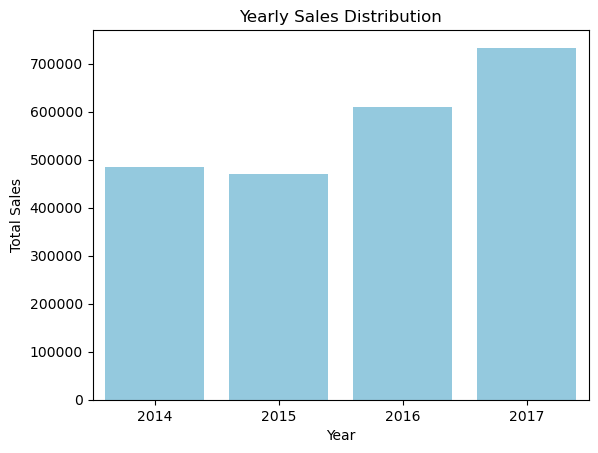

In [11]:
# Group the data by year and calculate total sales
yearly_sales = superstore_df.groupby('year')['sales'].sum().reset_index()

# Plot a barplot with lines on top
sns.barplot(data=yearly_sales, x='year', y='sales', color='skyblue')

# Set plot title and labels
plt.title('Yearly Sales Distribution')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

### Quarterly Analysis

In [12]:
quarterly_sales = superstore_df.groupby('quarter')['sales'].sum()
print(quarterly_sales)

quarter
1    359681.5758
2    445509.6196
3    613932.1057
4    878077.5592
Name: sales, dtype: float64


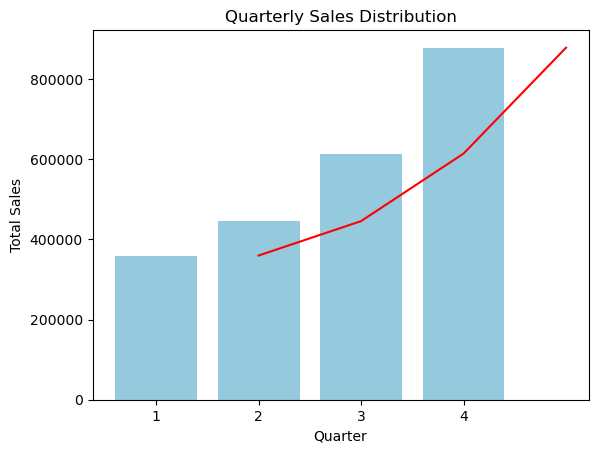

In [13]:
# Group the data by quarter and calculate total sales
quarterly_sales = superstore_df.groupby('quarter')['sales'].sum().reset_index()

# Plot a barplot with lines on top
sns.barplot(data=quarterly_sales, x='quarter', y='sales', color='skyblue')
sns.lineplot(data=quarterly_sales, x='quarter', y='sales', color='red')

# Set plot title and labels
plt.title('Quarterly Sales Distribution')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

### Monthly Analysis

In [14]:
monthly_sales = superstore_df.groupby('month')['sales'].sum()
print(monthly_sales)

month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: sales, dtype: float64


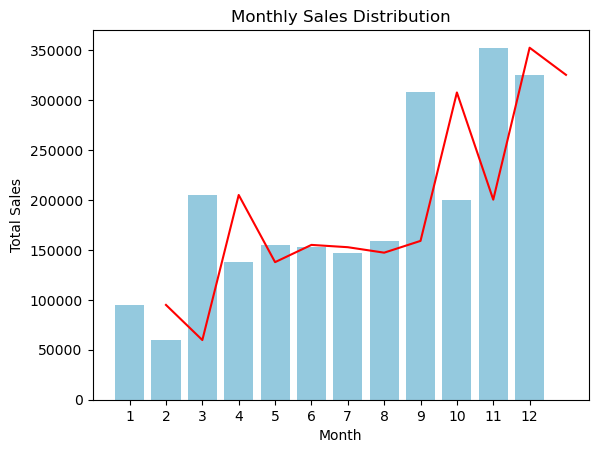

In [15]:
# Group the data by month and calculate total sales
monthly_sales = superstore_df.groupby('month')['sales'].sum().reset_index()

# Plot a barplot with lines on top
sns.barplot(data=monthly_sales, x='month', y='sales', color='skyblue')
sns.lineplot(data=monthly_sales, x='month', y='sales', color='red')

# Set plot title and labels
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

### Weekly Analysis

In [16]:
daily_sales = superstore_df.groupby('day')['sales'].sum()
print(daily_sales)

day
0    428937.8157
1    287209.5022
2     88056.9752
3    321965.7785
4    427692.2593
5    357984.6830
6    385353.8464
Name: sales, dtype: float64


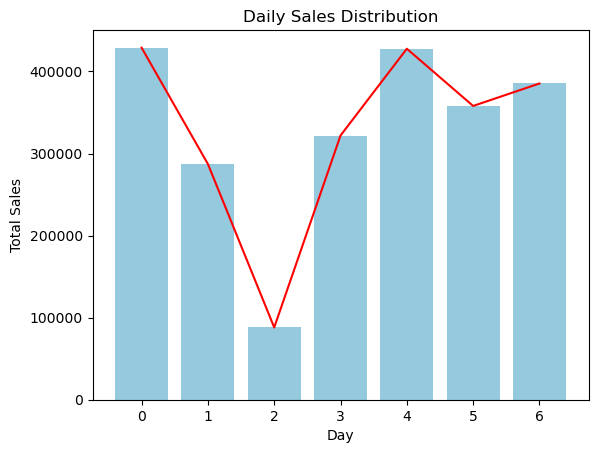

In [17]:
# Group the data by day and calculate total sales
daily_sales = superstore_df.groupby('day')['sales'].sum().reset_index()

# Plot a barplot with lines on top
sns.barplot(data=daily_sales, x='day', y='sales', color='skyblue')
sns.lineplot(data=daily_sales, x='day', y='sales', color='red')

# Set plot title and labels
plt.title('Daily Sales Distribution')
plt.xlabel('Day')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

## Profit, sales and loss margin

### Profit

In [18]:
# Calculate the profit for each product (by subtracting the cost from the revenue).         Sales= Price
profit_per_product = superstore_df.groupby('product_name')['profit'].sum().sort_values(ascending=False)

display("Top 10 most profitable products: ", profit_per_product.head(10))

'Top 10 most profitable products: '

product_name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: profit, dtype: float64

In [19]:
# Calculate the profits per product by multiplying 'profit' and 'quantity'
superstore_df['total_profit_per_product'] = (superstore_df['discount'] - superstore_df['profit']) * superstore_df['quantity'] 

# Group the data by product and calculate the sum of profits per product
total_profit_per_product = superstore_df.groupby('product_name')['total_profit_per_product'].sum().sort_values(ascending=False)

# Display the total profit per product
print("Top10 total profit per product:")
print(total_profit_per_product.head(10))

Top10 total profit per product:
product_name
Cubify CubeX 3D Printer Double Head Print                                       37565.1748
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                        30985.0956
Lexmark MX611dhe Monochrome Laser Printer                                       28057.9350
GBC DocuBind P400 Electric Binding System                                       23395.6082
Cubify CubeX 3D Printer Triple Head Print                                       15361.9616
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer    11793.2980
Cisco TelePresence System EX90 Videoconferencing Unit                           10869.4704
Bush Advantage Collection Racetrack Conference Table                             8460.7632
Balt Solid Wood Round Tables                                                     7393.8095
Martin Yale Chadless Opener Electric Letter Opener                               7197.4784
Name: total_profit_per_product, dtype: float6

### Sales

In [20]:
#Calculate the sales for each row by multiplying the quantity with the price.
total_sales_per_product = superstore_df.groupby('product_name')['quantity'].sum() * superstore_df.groupby('product_name')['sales'].sum()

# Sort the total sales in descending order
total_sales_per_product = total_sales_per_product.sort_values(ascending=False)

display("Top 10 total sales per product: ", total_sales_per_product.head(10))


'Top 10 total sales per product: '

product_name
Canon imageCLASS 2200 Advanced Copier                                          1231996.480
GBC Ibimaster 500 Manual ProClick Binding System                                913176.000
HON 5400 Series Task Chairs for Big and Tall                                    852952.464
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     851054.904
GBC DocuBind TL300 Electric Binding System                                      733468.723
Hewlett Packard LaserJet 3310 Copier                                            715908.068
SAFCO Arco Folding Chair                                                        613357.340
Bretford Rectangular Conference Table Tops                                      597783.409
Samsung Galaxy Mega 6.3                                                         543803.052
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back                     542513.928
dtype: float64

In [21]:
#Sum up the sales to get the total sales.
total_sales = superstore_df['sales'].sum()

display(total_sales)

2297200.8603000003

### Loss

In [22]:
# Calculate the losss per product by multiplying 'loss' and 'quantity'
superstore_df['total_loss_per_product'] = (superstore_df['discount'] - superstore_df['profit']) * superstore_df['quantity'] 

# Group the data by product and calculate the sum of loss per product
total_loss_per_product = superstore_df.groupby('product_name')['total_loss_per_product'].sum().sort_values(ascending=True)

# Display the total loss per product
print("Top10 total loss per product:")
print(total_loss_per_product.head(10))

Top10 total loss per product:
product_name
Canon imageCLASS 2200 Advanced Copier                                         -104157.3024
Hewlett Packard LaserJet 3310 Copier                                           -44080.6652
GBC Ibimaster 500 Manual ProClick Binding System                               -37569.4120
Canon PC1060 Personal Laser Copier                                             -26324.2239
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    -22487.1230
Ativa V4110MDD Micro-Cut Shredder                                              -22294.6815
3D Systems Cube Printer, 2nd Generation, Magenta                               -21969.8310
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      -20123.3850
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room             -18998.6800
Fellowes PB300 Plastic Comb Binding Machine                                    -17433.9505
Name: total_loss_per_product, dtype: float64


In [23]:
# Calculate the loss for each row where the profit is negative (loss = -profit)
superstore_df['loss'] = -superstore_df['profit'].where(superstore_df['profit'] < 0, 0)

# Group the data by 'product_name' and calculate the total loss per product
loss_per_product = superstore_df.groupby('product_name')['loss'].sum().reset_index().sort_values('loss', ascending=False)

# Sum up the losses to get the total loss.
total_loss = superstore_df['loss'].sum()

# Calculate the loss margin as (total loss / total sales) * 100.
loss_df = superstore_df[superstore_df['profit'] < 0]
total_loss = -loss_df['profit'].sum()
loss_margin = (total_loss / total_sales) * 100

display("Loss Margin: ", loss_margin)
display("Top 10 products with the biggest loss: ", loss_per_product.head(10))
display("Sum of Loss per Product: ", total_loss)


'Loss Margin: '

6.796588334883795

'Top 10 products with the biggest loss: '

,product_name,loss
475,Cubify CubeX 3D Printer Double Head Print,9239.9692
683,GBC DocuBind P400 Electric Binding System,6859.3896
985,Lexmark MX611dhe Monochrome Laser Printer,5269.9690
688,GBC Ibimaster 500 Manual ProClick Binding System,5098.5660
686,GBC DocuBind TL300 Electric Binding System,4162.0336
476,Cubify CubeX 3D Printer Triple Head Print,3839.9904
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,3431.6730
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,3107.5272
895,Ibico EPK-21 Electric Binding System,2929.4845
376,Bush Advantage Collection Racetrack Conference...,2545.2600


'Sum of Loss per Product: '

156131.2857

## Customer Purchasing Behavior Analysis

### Top 10 best customers

In [24]:
# Group the data by customer and calculate the count of orders
customer_orders = superstore_df.groupby('customer_name')['order_id'].count().reset_index()
customer_orders = customer_orders.rename(columns={'order_id': 'order_count'})
customer_orders = customer_orders.sort_values('order_count', ascending=False)

# Print the customers with the highest number of orders
print("Customers with the highest number of orders:")
print(customer_orders.head(10))

Customers with the highest number of orders:
           customer_name  order_count
787        William Brown           37
502         Matt Abelman           34
387             John Lee           34
595           Paul Prost           34
249         Edward Hooks           32
145  Chloris Kastensmidt           32
689          Seth Vernon           32
391     Jonathan Doherty           32
791     Zuschuss Carroll           31
60        Arthur Prichep           31


### Top 10 worst customers

In [25]:
# Group the data by customer and calculate the count of orders
customer_orders = superstore_df.groupby('customer_name')['order_id'].count().reset_index()
customer_orders = customer_orders.rename(columns={'order_id': 'order_count'})
customer_orders = customer_orders.sort_values('order_count', ascending=True)

# Print the customers with the highest number of orders
print("Customers with the lowest number of orders:")
print(customer_orders.head(10))

Customers with the lowest number of orders:
         customer_name  order_count
378     Jocasta Rupert            1
455       Lela Donovan            1
123       Carl Jackson            1
53   Anthony O'Donnell            1
625    Ricardo Emerson            1
707  Stefanie Holloman            2
737      Thais Sissman            2
612     Phillip Breyer            2
570     Nicole Brennan            2
94       Bobby Odegard            2


### Growth rate of new customers over the months

In [26]:
#  Plot of the growth rate of new customers over the months
# Extract month from 'order_date'
monthly_new_customers = superstore_df['month'] = superstore_df.groupby('month')['customer_id'].nunique()

# Calculate the month-over-month growth rate
monthly_growth_rate = monthly_new_customers.pct_change() * 100

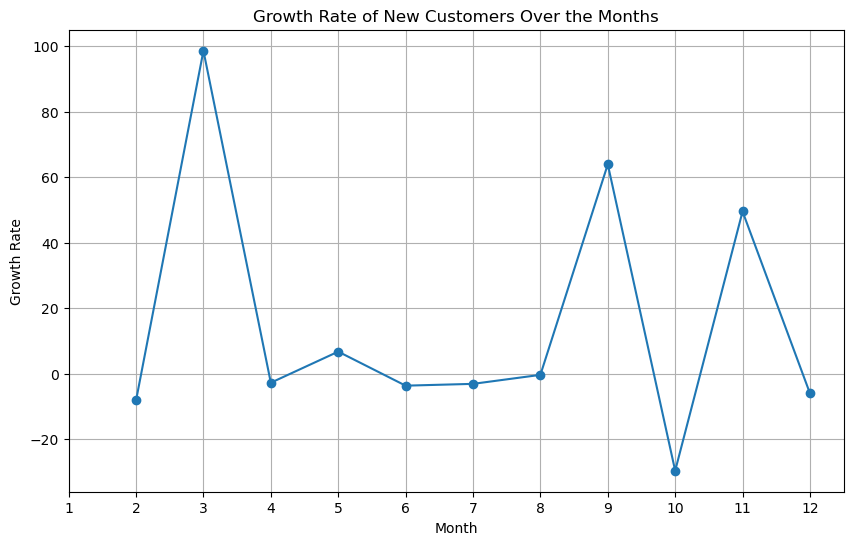

In [27]:
# Plot the growth rate over the months
plt.figure(figsize=(10, 6))
plt.plot(monthly_growth_rate.index, monthly_growth_rate.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of New Customers Over the Months')
plt.xticks(range(1, 13))  # Assuming 1-12 months
plt.grid(True)
plt.show()

## KPI'S Analysis

### Average order value (revenue / total orders)

In [29]:
# Calculate average order value
average_order_value = superstore_df['sales'].sum() / superstore_df['order_id'].nunique()

### Repeat purchase rate (purchase from repeat customers / total purchase)

In [30]:
# Calculate repeat purchase rate
repeat_purchase_rate = superstore_df[superstore_df['customer_id'].duplicated()]['order_id'].nunique() / superstore_df['order_id'].nunique()

### Average profit margin (gross profit / revenue)

In [31]:
# Calculate average profit margin
average_profit_margin = superstore_df['profit'].sum() / superstore_df['sales'].sum()

### Purchase frequency (total # of orders / total # of unique customers)

In [32]:
# Calculate purchase frequency
purchase_frequency = superstore_df['order_id'].nunique() / superstore_df['customer_id'].nunique()

### Year over year growth (last year / this year)

In [35]:
# Convert 'order_date' column to string type
superstore_df['order_date'] = superstore_df['order_date'].astype(str)

# Calculate year over year growth
last_year = superstore_df['order_date'].str[:4].min()
this_year = superstore_df['order_date'].str[:4].max()
year_over_year_growth = int(this_year) / int(last_year)


In [36]:
# Display the calculated metrics
metrics_df = pd.DataFrame({
    'Metric': ['Average Order Value', 'Repeat Purchase Rate', 'Average Profit Margin', 'Purchase Frequency', 'Year over Year Growth'],
    'Value': [average_order_value, repeat_purchase_rate, average_profit_margin, purchase_frequency, year_over_year_growth]
})

print(metrics_df)

                  Metric       Value
0    Average Order Value  458.614666
1   Repeat Purchase Rate    0.924935
2  Average Profit Margin    0.124672
3     Purchase Frequency    6.316520
4  Year over Year Growth    1.001490


## Geographical Analysis

### Top5 states generation the most sales revenue

In [ ]:
state_orders = superstore_df.groupby('state')['order_id'].count().reset_index()
state_orders = state_orders.rename(columns={'order_id': 'order_count'})
top_best_states = state_orders.sort_values('order_count', ascending=False)

# Print the states with the highest number of orders
print("States with the highest number of orders:")
print(top_best_states.head())

States with the highest number of orders:
           state  order_count
3     California         2001
30      New York         1128
41         Texas          985
36  Pennsylvania          587
45    Washington          506


### Top5 states generation the least sales revenue

In [ ]:
state_orders = superstore_df.groupby('state')['order_id'].count().reset_index()
state_orders = state_orders.rename(columns={'order_id': 'order_count'})
top_worst_states = state_orders.sort_values('order_count', ascending=True)

# Print the states with the highest number of orders
print("States with the highest number of orders:")
print(top_worst_states.head())

States with the highest number of orders:
                   state  order_count
48               Wyoming            1
46         West Virginia            4
32          North Dakota            7
17                 Maine            8
7   District of Columbia           10


# Analyses specific to geolocation data

## Geographic distribution of Customers on a map

In [ ]:
# Create a DataFrame with the top 50 cities by total sales and order count
city_data = superstore_df.groupby(['city', 'state', 'country']).agg({'sales': 'sum', 'order_id': 'count'}).reset_index()
city_data = city_data.rename(columns={'sales': 'total_sales', 'order_id': 'order_count'})
top_cities = city_data.sort_values('total_sales', ascending=False).head(200)

# Print the cities with the highest number of orders and their total sales
print("Cities with the highest number of orders and their total sales:")
print(top_cities)

Cities with the highest number of orders and their total sales:
              city         state        country  total_sales  order_count
380  New York City      New York  United States   256368.161          915
312    Los Angeles    California  United States   175851.341          747
517        Seattle    Washington  United States   119540.742          428
503  San Francisco    California  United States   112669.092          510
430   Philadelphia  Pennsylvania  United States   109077.013          537
..             ...           ...            ...          ...          ...
40      Belleville    New Jersey  United States     1891.600           10
226      Henderson        Nevada  United States     1888.058            3
53   Bowling Green          Ohio  United States     1865.565            8
288      Las Vegas        Nevada  United States     1834.020           13
196     Georgetown      Kentucky  United States     1786.420            8

[200 rows x 5 columns]


In [ ]:
# Create a map object centered at a specific latitude and longitude you want in the USA, for example:
map = folium.Map(location=[39.18786550380514,-98.93578850412071], zoom_start=5)

# Create a geolocator object
geolocator = Nominatim(user_agent="superstore")  # Create a geolocator object

# Sample a subset of the DataFrame
sample_size = 200  # Adjust the sample size as desired
sample_df = top_cities.sample(n=sample_size)

# Iterate over the sample DataFrame and add markers for each location
for index, row in sample_df.iterrows():
    city = row['city']
    address = f"{city}, {row['state']}, {row['country']}"
    location = geolocator.geocode(address)
    if location:
        lat = location.latitude
        lon = location.longitude
        marker = folium.Marker(location=[lat, lon], popup=city)
        marker.add_to(map)

# Save the map
# map.save('top200_cities_map.html')            ---->Comented to avoid overwriting

# Display the map
map

## Heatmap of cities with highest ammounts of sales

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map object centered at a specific latitude and longitude you want in the USA, for example:
map = folium.Map(location=[39.18786550380514, -98.93578850412071], zoom_start=5)

# Create a geolocator object
geolocator = Nominatim(user_agent="superstore")  # Create a geolocator object

# Sample a subset of the DataFrame
sample_size = 200  # Adjust the sample size as desired
sample_df = top_cities.sample(n=sample_size)

# Create lists to store latitude, longitude, order count, and sales values
lats = []
lons = []
order_counts = []
sales = []

# Iterate over the sample DataFrame and geocode the addresses
for index, row in sample_df.iterrows():
    city = row['city']
    address = f"{city}, {row['state']}, {row['country']}"
    location = geolocator.geocode(address)
    if location:
        lat = location.latitude
        lon = location.longitude
        order_count = row['order_count']
        sales_value = row['total_sales']
        lats.append(lat)
        lons.append(lon)
        order_counts.append(order_count)
        sales.append(sales_value)
        icon = folium.Icon(icon='shopping-cart', prefix='fa', color='blue')
        marker = folium.Marker(location=[lat, lon],
                               icon=icon,
                               popup=f"{city}<br>Order Count: {order_count}<br>Total Sales: {sales_value}")
        marker.add_to(map)

# Create a HeatMap layer using latitude, longitude, and sales values
heat_data = list(zip(lats, lons, sales))
HeatMap(heat_data).add_to(map)

# Save the map
# map.save('top200_cities_heatmap.html')        ---->Comented to avoid overwriting

# Display the map
map
